# LCAS People Cloud point Extration 

- 본 노트북에서는 Lincoln대 L-CAS연구팀에서 배포 하는 [L-CAS 3D Point Cloud People Dataset](https://lcas.lincoln.ac.uk/wp/research/data-sets-software/l-cas-3d-point-cloud-people-dataset/)데이터셋에서 라벨 데이터를 이용하여 사람만 추출하여 PCD파일로 저장 하는 방법을 다루고 있습니다. 

> 아직은 한 라벨에 한 사람만 있는 경우만 추출 합니다. 


In [53]:
%load_ext watermark
%watermark -d -v -p numpy
!pip freeze | grep pcl

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-12-12 

CPython 3.5.2
IPython 6.4.0

numpy 1.14.5
python-pcl==0.3


In [45]:
import pandas as pd
from open3d import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
%matplotlib inline  
import glob
import pcl
import os
from tqdm import tqdm_notebook

In [2]:
import sys
sys.path.append("/workspace/include")
from visualization_helper import *
from filter_helper import do_passthrough

In [26]:
labels = glob.glob('./LCAS_20160523_1200_1218_labels/*')
clouds = glob.glob('./LCAS_20160523_1200_1218_pcd/*')

In [44]:
print("전체 Label수 : {}".format(len(labels)))
print("전체 PCD 수 : {}".format(len(clouds)))

전체 Label수 : 5492
전체 PCD 수 : 8143


In [46]:
for i in tqdm_notebook(range (0,100)):#len(labels)-1):
    if os.path.getsize(labels[i]) != 0:
        label = pd.read_csv(labels[i], sep=' ',header=None)
        cloud = pcl.load(clouds[i])
        if len(label) == 1:
            cloud = do_passthrough(cloud, 'x', label[4].values, label[7].values)
            cloud = do_passthrough(cloud, 'y', label[5].values, label[8].values)
            cloud = do_passthrough(cloud, 'z', label[6].values, label[9].values)
            if (cloud.size!=0):
                pcl.save(cloud, "./pcd/test_"  + str(i) +".pcd")                      
    

In [12]:
!ls -al ./pcd/*.pcd

-rw-r--r-- 1 root root  6628 Dec 12 07:37 ./pcd/test_13.pcd
-rw-r--r-- 1 root root  5409 Dec 12 07:37 ./pcd/test_14.pcd
-rw-r--r-- 1 root root  5878 Dec 12 07:37 ./pcd/test_15.pcd
-rw-r--r-- 1 root root  6077 Dec 12 07:37 ./pcd/test_18.pcd
-rw-r--r-- 1 root root  5072 Dec 12 07:37 ./pcd/test_2.pcd
-rw-r--r-- 1 root root  1612 Dec 12 07:37 ./pcd/test_27.pcd
-rw-r--r-- 1 root root  9075 Dec 12 07:37 ./pcd/test_32.pcd
-rw-r--r-- 1 root root   782 Dec 12 07:37 ./pcd/test_36.pcd
-rw-r--r-- 1 root root  1212 Dec 12 07:37 ./pcd/test_38.pcd
-rw-r--r-- 1 root root  7377 Dec 12 07:37 ./pcd/test_41.pcd
-rw-r--r-- 1 root root  6291 Dec 12 07:37 ./pcd/test_43.pcd
-rw-r--r-- 1 root root  7189 Dec 12 07:37 ./pcd/test_44.pcd
-rw-r--r-- 1 root root  3648 Dec 12 07:37 ./pcd/test_45.pcd
-rw-r--r-- 1 root root  5429 Dec 12 07:37 ./pcd/test_52.pcd
-rw-r--r-- 1 root root  3255 Dec 12 07:37 ./pcd/test_54.pcd
-rw-r--r-- 1 root root  4029 Dec 12 07:37 ./pcd/test_59.pcd
-rw-r--r-- 1 root root  6001 Dec 12 07:37

# 결과물 살펴 보기 

In [38]:
i = 14
label = pd.read_csv(labels[i], sep=' ',header=None)
cloud = pcl.load(clouds[i])
print("Label File : {}".format(labels[i]))
print("PCD File : {}".format(clouds[i]))


Label File : ./LCAS_20160523_1200_1218_labels/1464001584.906779000.txt
PCD File : ./LCAS_20160523_1200_1218_pcd/1464002020.420151000.pcd


In [39]:
label

,0,1,2,3,4,5,6,7,8,9,10
0,group,-3.35043,-3.17892,0.339503,-3.52174,-3.66627,-0.421834,-3.15572,-2.6284,0.884972,1


```
Column 1:	category (pedestrian or group)
Column 2-4:	centroid (x-y-z)
Column 5-7:	minimum bounds (x-y-z)
Column 8-10:	maximum bounds (x-y-z)
Column 11:	visibility (0 = visible, 1 = partially visible)
```

In [40]:
cloud = do_passthrough(cloud, 'x', label[4].values, label[7].values)
cloud = do_passthrough(cloud, 'y', label[5].values, label[8].values)
cloud = do_passthrough(cloud, 'z', label[6].values, label[9].values)

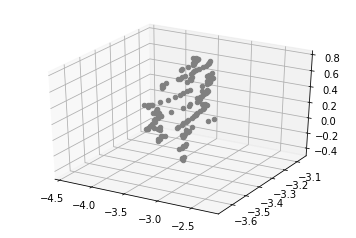

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(label[4].values-1, label[7].values+1)
#ax.set_ylim3d(label[5].values-1,label[8].values+1)
#ax.set_zlim3d(label[6].values-1,label[9].values+1)

#ax.scatter(cetx, cety, cetz, c='red')
#ax.scatter(xmin, ymin, zmin, c='blue')
#ax.scatter(xmax, ymax, zmax, c='black')

for z in range(1,cloud.size-1):
    xs = cloud[z][0]#xs = randrange(n, 23, 32)
    ys = cloud[z][1]#randrange(n, 0, 100)
    zs = cloud[z][2]#randrange(n, zlow, zhigh)

    ax.scatter(xs, ys, zs, c='grey')
    

plt.show()

# 추출된 파일 확인

In [42]:
filename = "./pcd/test_"  + str(i) +".pcd"
cloud = pcl.load(filename)
visualization_inter3D_xyz(cloud.to_array())

159


Output()

(x) : 0.3m
(y) : 0.6m
(z) : 1.2m


# 참고자료

![image](https://user-images.githubusercontent.com/17797922/49854160-31628380-fd9e-11e8-87a0-43cff62faf96.png)

> 출처 : [Python Graphics: A Reference for Creating 2D and 3D Images](https://books.google.co.kr/books?id=KyVhDwAAQBAJ&pg=PA114&lpg=PA114&dq=python+8+corner+box&source=bl&ots=QQ7WLxxvJO&sig=Vju4jej1yfqRwojDHn9SAR4TXMM&hl=ko&sa=X&ved=2ahUKEwjXlqyOt5XfAhWDXbwKHV-cAbYQ6AEwCHoECAUQAQ#v=onepage&q=python%208%20corner%20box&f=false) : 114page